# Optimal Polynomial Degree

R-squared score is measure of how close the data points are to the fitted regression line. It is the proportion of the response variable variation that is explained by the fitted model. Therefore, the higher the R-squared score, the better the fit.

Generating a data set to fit the polynomial regression model:

In [1]:
%matplotlib inline
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

Fitting the polynomial regression model and generating the respective r-squared scores for varying degrees:

In [2]:
degrees = list(range(1,11)) #Generate a list of degrees to work with. In this case, 1 to 10.
r2_values =[] # List to store the generated r-squared scores

for degree in degrees:
    #Fit the polynomial with the polyfit function from numpy (This generates the coefficients). 
    #The poly1d function aligns the coefficients in form of a + bx+cx^2....
    fitted_polynomial =  np.poly1d(np.polyfit(x, y, degree))
    r2 = r2_score(y, fitted_polynomial(x)) #Generate the respective r-squared scores
    r2_values.append(r2)

We can now visualize the generated r-squared scores, for the respective polynomial degrees.

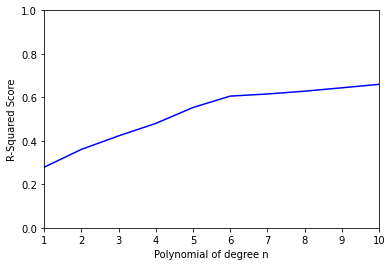

In [3]:
xp = np.linspace(1, 10,10)
axes = plt.axes()
axes.set_xlim([1,10])
axes.set_ylim([0, 1])
plt.plot(xp, r2_values , c='b')
plt.xlabel('Polynomial of degree n')
plt.ylabel('R-Squared Score')
plt.show()

Clearly, the r-squared score improves when we use higher degree polynomials. However, this is not always good news. This could lead to the classical modelling error-  overfitting. This is the case where the model fits the given data set closely, but it may fail to fit additional data, or a different data set well. We can visualize how the model fits the data, for instance a 8th-degree polynomial.

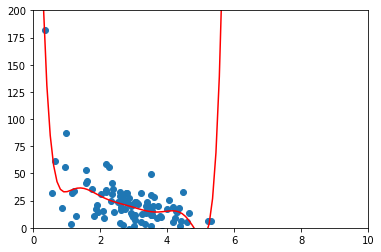

In [4]:
polynomial_fit = np.poly1d(np.polyfit(x, y, 8))
x_spacing = np.linspace(0, 10, 100)
axes = plt.axes()
axes.set_xlim([0,10])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(x_spacing, polynomial_fit(x_spacing), c='r')
plt.show()

To test for overfitting, we can split the data into **Train and Test** segments, fit the model in the training data set, and test the performance on the 'foreign ' training data set. We will use a 80% proportion for the training data set and 20% for test.

In [6]:
train_data_X = np.array(pageSpeeds[:80])
train_data_Y =np.array( purchaseAmount[:80])
test_data_X = np.array(pageSpeeds[80:])
test_data_Y =np.array( purchaseAmount[80:])

test_r2_values =[]
for degree in degrees:
    #fit the model on the training data set
    fitted_polynomial =  np.poly1d(np.polyfit(train_data_X , train_data_Y, degree))
    #test the model on the test data, by getting the respective r-squared scores
    r2 = r2_score(test_data_Y, fitted_polynomial(test_data_X))
    test_r2_values.append(r2)

We can visualize the resultant r-squared scores as below:

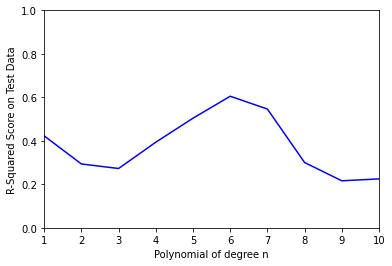

In [7]:
xp = np.linspace(1, 10,10)
axes = plt.axes()
axes.set_xlim([1,10])
axes.set_ylim([0, 1])
plt.plot(xp, test_r2_values , c='b')
plt.xlabel('Polynomial of degree n')
plt.ylabel('R-Squared Score on Test Data')
plt.show()

A 6th-degree polynomial fits the test data best. A polynomial of a higher degree than this could lead to overfitting.